# Outliers and anomalies
- The terms _outliers_ and _anomalies_ can sometimes be synonymous, but have different origins in data analysis.
- An _outlier_ in statistics is typically defined with respect to some known (or assumed) distribution and its statistics.
    - An _outlier_ in a dataset does not have the same properties as the majority of observations or is more _extreme_ in some sense.
    - An _outlier_ in a model is either _extreme_ in the data distribution or its predictions deviate more from the truth than the typical observation does.
- An _anomaly_ in machine learning is typically an observation that deviates from the the majority of observations or from the samples in its local neighbourhood.
    - There are fewer assumptions about distributions in machine learning than statistics.

## Outliers for 1D data
- A simple representation of data is the box (and whiskers) plot.
- A common choice is to stop the whiskers at 1.5 IQR, where IQR = 75th percentile - 25th percentile.

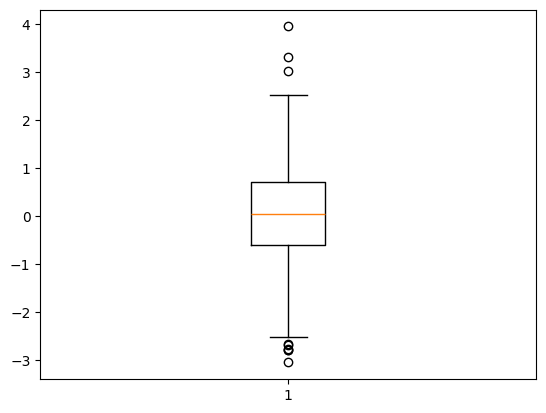

In [1]:
# Random data
import numpy as np
np.random.seed(1)
data = np.random.normal(0, 1, 1000)

# A boxplot of the data
import matplotlib.pyplot as plt
plt.boxplot(data)
plt.show()

### Boxplot properties
... assuming normal distributed data.

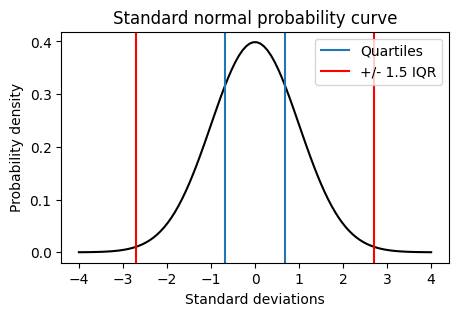

Upper whisker: 2.698 standard deviations
Probability of being outside whiskers: 1.993%


In [2]:
# Plot the normal probability curve from -4 to 4 with mean 0 and standard deviation 1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, color='black')
plt.xlabel('Standard deviations')
plt.ylabel('Probability density')
plt.title('Standard normal probability curve')
# Add lines for the quartiles and whiskers
plt.axvline(stats.norm.isf(1-0.25))
plt.axvline(stats.norm.isf(1-0.75), label="Quartiles")
plt.axvline(stats.norm.isf(1-0.25) - (stats.norm.isf(1-0.75)-stats.norm.isf(1-0.25))*1.5, color='red')
plt.axvline(stats.norm.isf(1-0.75) + (stats.norm.isf(1-0.75)-stats.norm.isf(1-0.25))*1.5, color='red', label="+/- 1.5 IQR")
plt.legend()
plt.show()
# Print the value of the upeer whisker
upper = stats.norm.isf(1-0.75) + (stats.norm.isf(1-0.75)-stats.norm.isf(1-0.25))*1.5
print("Upper whisker: {:.3f} standard deviations".format(upper))
print("Probability of being outside whiskers: {:.3f}%".format(stats.norm.cdf(upper)*2))

## Outliers in models
- An outlier in the input data, __X__, will influence some models more than a central point would do.
    - In regression (Ordinary Least Squares), these are called high leverage points.  
    OLS for $\tilde{X} = [1 ~ X]$:  
    $\tilde{X}\beta = \tilde{X} (\tilde{X}'\tilde{X})^{-1} \tilde{X}' Y$  
    Leverage $h_{ii}$ from the diagonal of $H = \tilde{X} (\tilde{X}'\tilde{X})^{-1} \tilde{X}'$.
- An outlier in the response, __y__, can be caused by a model of wrong complexity.
    - Too complex: Overfitting, bad generalisation.
    - Too simple: Does not fit well enough to describe important variation.

## Handling outliers/anomalies
- An outier can be the caused by errors in measurements, faulty registration or random variation.
    - Or it can be deviating because of unexplained, but important, phenomena.
- Depending on the case at hand, there are several options for handling outliers:
    - Remove the outlying measurement - results in missing data.
    - Impute the values of the outlier, i.e., replace it by something _inlying_, e.g., average over nearest neighbours (pre-processing section).
    - Use a smoothed value according to the local trend ([Noise reduction](../1_Signal/2_Noise_reduction.ipynb)).
    - For visualisation, present a smoothed signal, but show the underlying variation as a shadow or error region (shown below).
        - Or mark outliers in the plot with contrasting colour ([Outlier statistics](./2_Outlier_statistics.ipynb))
    - Sound an alarm, e.g., a warning sign, alerting an operator to potential problems (dashboard section).

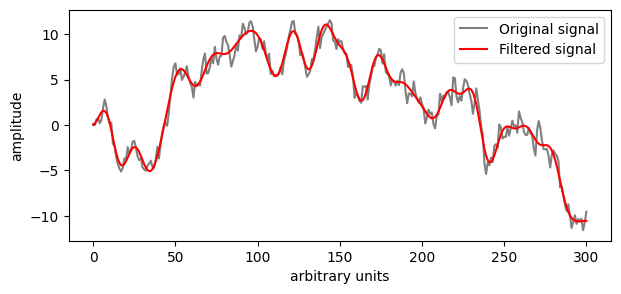

In [3]:
# Random signal
N = 301
rng = np.random.default_rng(0)
y = rng.standard_normal(N).cumsum()

# Remove frequencies above 40, i.e., a low-pass filter.
from scipy.fft import dct, idct
W = np.arange(0, N) # Frequency axis
filtered_fourier_signal = dct(y)
x = filtered_fourier_signal.copy()
filtered_fourier_signal[(W > 40)] = 0
cut_signal = idct(filtered_fourier_signal)

# Plot the curve
plt.figure(figsize=(7,3))
plt.plot(y, label='Original signal', color='gray')
plt.plot(cut_signal, label='Filtered signal', color='red')
plt.xlabel('arbitrary units')
plt.ylabel('amplitude')
plt.legend()
plt.show()

```{seealso} 
:class: tip

## Resources
- [Wikipedia: Box plot](https://en.wikipedia.org/wiki/Box_plot)
- [Wikipedia: Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range)